EDA - PI01 - ANALISIS DE DATOS PARA TELECOMUNICACIONES EN ARGENTINA

EL SIGUIENTE ANALISIS TIENE POR OBJETIVO HACER LIMPIEZA DE DATOS Y ENCONTRAR INSIGHTS DE INTERES PARA REALIZAR UN DASHBOARD INTERACTIVO.

In [7]:
# Importamos todas las librerias que nos van a hacer falta en el EDA.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [61]:
# Vamos a crear un dataframe calendario que nos va a permitir manejar mejor los datos para el dashboard en powerBI.

fechas = pd.date_range(start='2014-01-01', end='2024-06-30', freq='Q')
df_calendario = pd.DataFrame(fechas, columns=['Fecha'])

In [62]:
df_calendario['Año'] = df_calendario['Fecha'].dt.year
df_calendario['Trimestre'] = df_calendario['Fecha'].dt.quarter

In [ ]:
# Creamos un valor unico para cada fila para poder relacionarlos con el resto de datos.

df_calendario['id'] = df_calendario['Año'].astype(str).str.cat(df_calendario['Trimestre'].astype(str),sep='-')

In [64]:
df_calendario.tail()

,Fecha,Año,Trimestre,id
37,2023-06-30,2023,2,2023-2
38,2023-09-30,2023,3,2023-3
39,2023-12-31,2023,4,2023-4
40,2024-03-31,2024,1,2024-1
41,2024-06-30,2024,2,2024-2


In [65]:
df_calendario['id'].is_unique

True

In [66]:
df_calendario.to_excel('Procesed data/df_calendario.xlsx', index=False)

In [ ]:
# Tambien vamos a crear un dataframe con las provincias que nos va a facilitar el manejo de datos en el Dashboard.

In [ ]:
# Obtenemos los valores de las provincias usando un dataframe que ya los contenga.

localidades = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos_tecnologia_localidad')
localidades.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [150]:
provincias = localidades[['Provincia']]
provincias.head()

,Provincia
0,BUENOS AIRES
1,BUENOS AIRES
2,BUENOS AIRES
3,BUENOS AIRES
4,BUENOS AIRES


In [151]:
provincias.drop_duplicates(inplace=True)
provincias.count()

C:\Users\franc\AppData\Local\Temp\ipykernel_8224\3425974535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias.drop_duplicates(inplace=True)


Provincia    24
dtype: int64

In [152]:
provincias['Pais'] = 'Argentina'

C:\Users\franc\AppData\Local\Temp\ipykernel_8224\485025931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincias['Pais'] = 'Argentina'


In [153]:
provincias

,Provincia,Pais
0,BUENOS AIRES,Argentina
2313,CABA,Argentina
2320,CATAMARCA,Argentina
2450,CHACO,Argentina
2651,CHUBUT,Argentina
2791,CORDOBA,Argentina
3680,CORRIENTES,Argentina
3848,ENTRE RIOS,Argentina
4158,FORMOSA,Argentina
4285,JUJUY,Argentina


In [154]:
provincias.to_excel('Procesed data/provincias.xlsx', index=False)

PARA OBTENER LOS DATOS, SE UTILIZA EL ARCHIVO PRINCIPAL QUE CONTIENE DISTINTAS HOJAS. DE ESTAS HOJAS SE VAN A SELECCIONAR SOLO AQUELLAS QUE TIENEN DATOS DE UTILIDAD PARA EL ANALISIS Y MUESTRA EN EL DASHBOARD. 

HOJA Velocidad % por prov

In [2]:
vel_por_prov = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Velocidad % por prov')

In [6]:
vel_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.410000
1,2024,2,Capital Federal,233.010000
2,2024,2,Catamarca,97.380000
3,2024,2,Chaco,107.760000
4,2024,2,Chubut,21.670000
...,...,...,...,...
1003,2014,1,Santa Cruz,3.315991
1004,2014,1,Santa Fe,3.147407
1005,2014,1,Santiago Del Estero,2.949472
1006,2014,1,Tierra Del Fuego,3.446888


In [ ]:
# Tenemos que explorar: 
# Valores faltantes, valores atipicos, duplicados, etc.

In [4]:
vel_por_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [5]:
vel_por_prov['Mbps (Media de bajada)'].describe()

count    1008.000000
mean       24.720245
std        33.660764
min         2.573729
25%         4.866698
50%        10.089315
75%        29.875292
max       234.440000
Name: Mbps (Media de bajada), dtype: float64

In [ ]:
# SE PUEDE OBSERVAR QUE PARA ESTE DATASET, NO TENEMOS VALORES FALTANTES, DUPLICADOS NI ATIPICOS.

In [ ]:
# Vamos a borrar los acentos que tienen los nombres de las provincias, ya que pueden traer 
# problemas para correlacionarlos con otras tablas.

In [8]:
vel_por_prov['Provincia'] = vel_por_prov['Provincia'].apply(unidecode)

In [9]:
vel_por_prov

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.410000
1,2024,2,Capital Federal,233.010000
2,2024,2,Catamarca,97.380000
3,2024,2,Chaco,107.760000
4,2024,2,Chubut,21.670000
...,...,...,...,...
1003,2014,1,Santa Cruz,3.315991
1004,2014,1,Santa Fe,3.147407
1005,2014,1,Santiago Del Estero,2.949472
1006,2014,1,Tierra Del Fuego,3.446888


In [15]:
# Veamos como es la distribucion de la velocidad para el año 2024 en las distintas provincias.

vel_por_prov[['Provincia','Mbps (Media de bajada)']][vel_por_prov['Año'] == 2024].groupby('Provincia').mean().sort_values('Mbps (Media de bajada)', ascending=False)

,Mbps (Media de bajada)
Provincia,
Capital Federal,231.475
San Luis,180.550
Buenos Aires,158.270
Cordoba,116.140
Chaco,107.635
Tucuman,106.145
Corrientes,103.375
Santa Fe,101.355
Entre Rios,101.170


VEMOS QUE EXISTEN UNA MARCADA DIFERENCIA ENTRE EL PROMEDIO DE LA VELOCIDAD DE BAJADA PARA LAS DISTINTAS PROVINCIAS. ESTE DATO ES DE INTERES PARA TENER UN PANORAMA DE LAS EXIGENCIAS DE CADA PROVINCIA.

In [16]:
# Guardamos este dataset ya limpio para ser usado en el dashboard.

vel_por_prov.to_excel('Procesed data/vel-por-prov.xlsx', index=False)

HOJA Totales VMD

In [17]:
totales_vmd = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Totales VMD')

In [18]:
totales_vmd.head(5)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [19]:
# Eliminamos columnas que no son de interes.

totales_vmd.drop(labels='Trimestre.1', axis=1, inplace=True)

In [20]:
# Agregamos id para mayor organizacion.

totales_vmd['id'] = totales_vmd['Año'].astype(str).str.cat(totales_vmd['Trimestre'].astype(str),sep='-')

In [21]:
totales_vmd['id'].is_unique

True

In [22]:
totales_vmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   id                      42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [ ]:
# Vamos a ver la evolucion de la velocidad a lo largo de los años en Argentina.

In [23]:
promedio_por_año = totales_vmd.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()

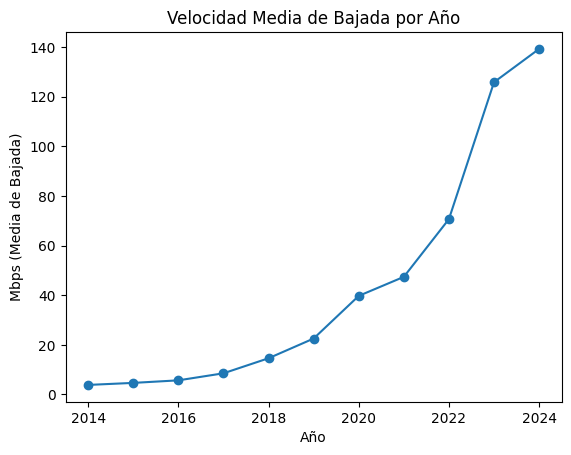

In [24]:
# Crear el gráfico de dispersión
plt.plot(promedio_por_año['Año'], promedio_por_año['Mbps (Media de bajada)'], marker='o', label='Velocidad Media de Bajada por Año')

# Añadir títulos y etiquetas
plt.title('Velocidad Media de Bajada por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de Bajada)')

# Mostrar el gráfico
plt.show()


PODEMOS VER UN AUMENTO CONTINUO DE LA MEDIA DE VELOCIDAD DE BAJADA DE INTERNET A LO LARO DE LOS AÑOS, ASI COMO TAMBIEN UNA ACELERACION DEL CRECIMIENTO DE LA VELOCIDAD DESDE EL 2018 EN ADELANTE. 

In [106]:
# Guardamos los datos en un archivo nuevo.

totales_vmd.to_excel('Procesed data/totales_vmd.xlsx', index=False)

HOJA Accesos_tecnologia_localidad

In [25]:
accesos_tecnologia_localidad = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos_tecnologia_localidad')

In [26]:
accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [27]:
accesos_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


In [28]:
accesos_tecnologia_localidad['Accesos'].isna().sum()

6

In [29]:
# Vemos que existen valores faltantes. 

accesos_tecnologia_localidad[accesos_tecnologia_localidad['Accesos'].isna()]

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
3755,CORRIENTES,Ituzaingó,Colonia Liebig's,Otros,18084010,NaN
4101,ENTRE RIOS,Tala,Rosario del Tala,Otros,30091100,NaN
5744,SALTA,Cafayate,Tolombón,Otros,66021020,NaN
6005,SALTA,San Carlos,Animaná,Otros,66154020,NaN
6010,SALTA,San Carlos,San Carlos,Otros,66154040,NaN
7372,SANTIAGO DEL ESTERO,Choya,Frías,Otros,86063040,NaN


In [30]:
# Debido a que son 6 localidades dentro de 7753, se decide colocar como cantidad de 
# accesos el valor 0, ya que estas localidades equivalen al 0,07% de la totalidad.

accesos_tecnologia_localidad['Accesos'].fillna(0, inplace=True)

In [ ]:
# Borramos la columna 'Link Indec' ya que no aporta informacion de interes.

accesos_tecnologia_localidad.drop(labels='Link Indec', axis=1, inplace=True)

In [32]:
accesos_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Accesos     7753 non-null   float64
dtypes: float64(1), object(4)
memory usage: 303.0+ KB


In [33]:
# Sacamos los acentos de los nombres de las provincias.

accesos_tecnologia_localidad['Provincia'] = accesos_tecnologia_localidad['Provincia'].apply(unidecode)

In [34]:
accesos_tecnologia_localidad['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [38]:
accesos_tecnologia_localidad['Tecnologia'].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'Otros', 'DIAL UP', 'OTROS', 'WIMAX', 'Cablemodem'], dtype=object)

In [43]:
# Vamos a unificar los datos de las tecnologias transformando todo a mayusculas.

accesos_tecnologia_localidad['Tecnologia'] = accesos_tecnologia_localidad['Tecnologia'].str.upper()

In [44]:
accesos_tecnologia_localidad['Tecnologia'].unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'OTROS', 'DIAL UP', 'WIMAX'], dtype=object)

In [49]:
# Vamos a ver como es la distribucion de las tecnologias con mas accesos.

accesos_tecnologia_localidad_grafico = accesos_tecnologia_localidad[['Accesos','Tecnologia']].groupby('Tecnologia').sum().sort_values('Accesos', ascending=False)

In [50]:
accesos_tecnologia_localidad_grafico

,Accesos
Tecnologia,
CABLEMODEM,5867504.0
FIBRA OPTICA,4169958.0
ADSL,733491.0
WIRELESS,593197.0
OTROS,174996.0
DIAL UP,11793.0
SATELITAL,2930.0
WIMAX,2238.0


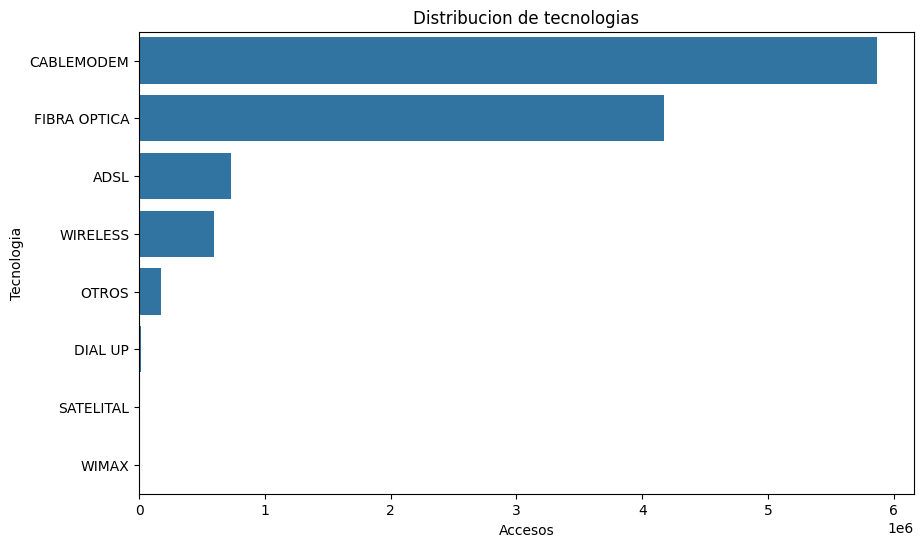

In [53]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos', y='Tecnologia', data=accesos_tecnologia_localidad_grafico, orient='h')

# Añadir títulos y etiquetas
plt.title('Distribucion de tecnologias')
plt.xlabel('Accesos')
plt.ylabel('Tecnologia')

# Mostrar el gráfico
plt.show()


A PARTIR DE ESTE DATO VEMOS QUE, EN LA ACTUALIDAD, LA TECNOLOGIAS PREDOMINANTES EN ARGENTINA SON EL CABLEMODEM Y LA FIBRA OPTICA.

In [48]:
# Guardamos la hoja en un nuevo archivo.

accesos_tecnologia_localidad.to_excel('Procesed data/accesos-tecnologia-localidad.xlsx', index=False)

HOJA Totales Accesos Por Tecnología

In [54]:
accesos_internet_tecnologia = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Totales Accesos Por Tecnología')

In [55]:
accesos_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [56]:
accesos_internet_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB


In [57]:
accesos_internet_tecnologia['Periodo'].is_unique

True

In [ ]:
# Vemos que no hay valores nulos ni duplicados. Falta determinar si hay valores atipicos.

In [58]:
# Vamos a eliminar la columna 'periodo' que no es de relevancia.

accesos_internet_tecnologia.drop(labels='Periodo', axis=1, inplace=True)

In [59]:
accesos_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,733491,5867504,4169958,593197,191957,11556107
1,2024,1,774475,5986957,4015101,598682,257941,11633156
2,2023,4,836390,6022532,3908183,585760,194796,11547661
3,2023,3,897895,6018832,3708718,581436,200027,11406908
4,2023,2,1006509,5997149,3463988,581823,202428,11251897


In [ ]:
# Vamos a agregar una columna con la fecha conjunta llamada 'id'. Esto nos va a facilitar luego el 
# manejo de datos en el dashboard.

In [60]:
accesos_internet_tecnologia['id'] = accesos_internet_tecnologia['Año'].astype(str).str.cat(accesos_internet_tecnologia['Trimestre'].astype(str),sep='-')

In [61]:
accesos_internet_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,id
0,2024,2,733491,5867504,4169958,593197,191957,11556107,2024-2
1,2024,1,774475,5986957,4015101,598682,257941,11633156,2024-1
2,2023,4,836390,6022532,3908183,585760,194796,11547661,2023-4
3,2023,3,897895,6018832,3708718,581436,200027,11406908,2023-3
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,2023-2


In [62]:
accesos_internet_tecnologia['id'].is_unique

True

In [63]:
# Calcular la media de los accesos por año para graficar los valores de cada tecnologia

media_por_anio = accesos_internet_tecnologia.drop(labels='id', axis=1).groupby('Año').mean().reset_index()

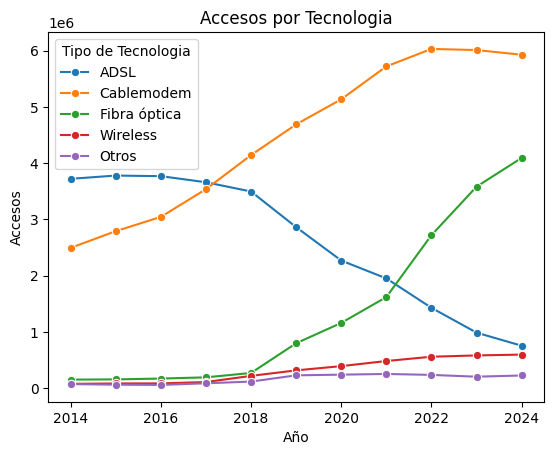

In [64]:
# Crear el gráfico de líneas
sns.lineplot(x='Año', y='ADSL', data=media_por_anio, marker='o', label='ADSL')
sns.lineplot(x='Año', y='Cablemodem', data=media_por_anio, marker='o', label='Cablemodem')
sns.lineplot(x='Año', y='Fibra óptica', data=media_por_anio, marker='o', label='Fibra óptica')
sns.lineplot(x='Año', y='Wireless', data=media_por_anio, marker='o', label='Wireless')
sns.lineplot(x='Año', y='Otros', data=media_por_anio, marker='o', label='Otros')

# Añadir títulos y etiquetas
plt.title('Accesos por Tecnologia')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend(title='Tipo de Tecnologia')

# Mostrar el gráfico
plt.show()



PODEMOS VER QUE LAS CURVAS SON SUAVES, NO TIENEN SALTOS, POR LO TANTO NO TENEMOS VALORES ATIPICOS. 

TAMBIEN PODEMOS VER UNA TENDENCIA EN EL CRECIMIENTO DE TECNOLOGIAS COMO LA FIBRA OPTICA Y CABLEMODEM.

In [79]:
# Vamos a ver la evolucion en el tiempo de la cantidad de accesos.

accesos_internet_tecnologia_grafico = accesos_internet_tecnologia[['id','Total']].sort_values('id').reset_index(drop=True).reset_index()

In [83]:
accesos_internet_tecnologia_grafico.head()

,index,id,Total
0,0,2014-1,6398398
1,1,2014-2,6464468
2,2,2014-3,6595271
3,3,2014-4,6598496
4,4,2015-1,6737732


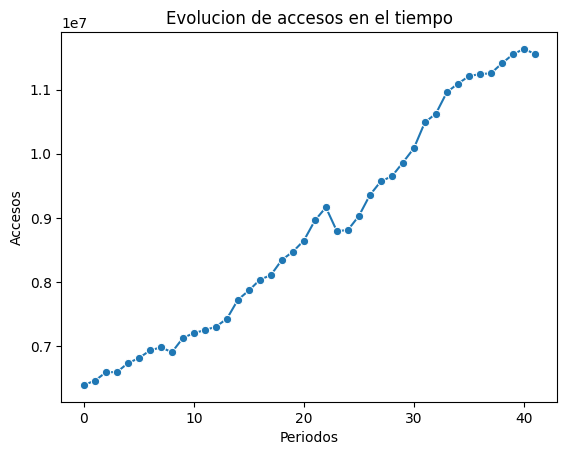

In [84]:
# Crear el gráfico de líneas
sns.lineplot(x='index', y='Total', data=accesos_internet_tecnologia_grafico, marker='o')

# Añadir títulos y etiquetas
plt.title('Evolucion de accesos en el tiempo')
plt.xlabel('Periodos')
plt.ylabel('Accesos')

# Mostrar el gráfico
plt.show()

PODEMOS OBSERVAR QUE LA EVOLUCION DE LA CANTIDAD DE ACCESOS A INTERNET, EN GENERAL, TIENDEN A INCREMENTAR EN EL TIEMPO. ESTO ES POSITIVO YA QUE NOS DA UN PANORAMA DE CRECIMIENTO EN EL SECTOR.

In [122]:
# Guardamos el dataset en un archivo.

accesos_internet_tecnologia.to_excel('Procesed data/accesos-internet-tecnologia.xlsx', index=False)

HOJA Accesos Por Tecnología

In [14]:
accesos_tecnologia_provincia = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos Por Tecnología')

In [15]:
accesos_tecnologia_provincia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [16]:
accesos_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [ ]:
# Veamos que valores no son numeros enteros en la columna 'Año'.

accesos_tecnologia_provincia[~accesos_tecnologia_provincia['Año'].apply(lambda x: isinstance(x, int))]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
455,2019 *,3 *,Buenos Aires,1277249.0,2144956.0,425386.0,85572.0,27070.0,3960233.0
456,2019 *,3 *,Capital Federal,300288.0,1080973.0,24900.0,3895.0,31155.0,1441211.0
457,2019 *,3 *,Catamarca,24349.0,5543.0,13.0,244.0,2251.0,32400.0
458,2019 *,3 *,Chaco,50416.0,49156.0,8063.0,5224.0,1592.0,114451.0
459,2019 *,3 *,Chubut,37298.0,27090.0,1917.0,15149.0,7551.0,89005.0
...,...,...,...,...,...,...,...,...,...
524,2019 *,1 *,Santiago Del Estero,25337.0,61547.0,23.0,2847.0,99.0,89853.0
525,2019 *,1 *,Tierra Del Fuego,19789.0,23549.0,1623.0,0.0,1486.0,46447.0
526,2019 *,1 *,Tucumán,159215.0,11670.0,118.0,678.0,321.0,172002.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


VEMOS QUE HAY DATOS QUE INDICAN QUE EN EL AÑO 2019 SE TOMARON VALORES QUE NO COINCIDEN A NIVEL NACIONAL. EN EL CASO DE USAR ESTA TABLA, HAY QUE TENER EN CUENTA ESTE AVISO.

In [ ]:
# Para poder hacer uso de esta tabla, tenemos que limpiar los datos 
# de la columna 'Año' y 'Trimestre', y borrar los datos faltantes.

In [37]:
accesos_tecnologia_provincia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Borramos las dos ultimas filas.

accesos_tecnologia_provincia.drop(axis=0, inplace=True, index=[1007, 1008])

In [39]:
accesos_tecnologia_provincia.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1002,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
1003,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0


In [40]:
# Reemplazamos los valores que tienen '*' y luego convertimos a tipo entero.

accesos_tecnologia_provincia = accesos_tecnologia_provincia.map(lambda x: x.replace('*', '') if isinstance(x, str) else x)

In [41]:
accesos_tecnologia_provincia['Año'] = accesos_tecnologia_provincia['Año'].astype(int)
accesos_tecnologia_provincia['Trimestre'] = accesos_tecnologia_provincia['Trimestre'].astype(int)

In [42]:
accesos_tecnologia_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1007 non-null   int32  
 1   Trimestre     1007 non-null   int32  
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), int32(2), object(1)
memory usage: 63.1+ KB


In [ ]:
# Por ultimo guardamos el dataset listo para su consumo.

In [44]:
accesos_tecnologia_provincia.to_excel('Procesed data/accesos-tecnologia-provincia.xlsx', index=False)

ESTA HOJA NO VA A SER UTILIZADA EN EL DASHBOARD YA QUE CONTIENE LA MISMA INFORMACION QUE OBTUVIMOS CON LA TABLA accesos_tecnologia_localidad. A SU VEZ, ESTA TABLA TENIA ERROR EN LA CARGA DEL 2019, MOTIVO EXTRA PARA DESCARTARLA.

HOJA Penetración-poblacion

In [85]:
penetracion_poblacion = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Penetración-poblacion')

In [86]:
penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [87]:
penetracion_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [88]:
# Vemos que valores faltantes no tiene, hay que ver duplicados y atipicos. 

promedio_por_año = penetracion_poblacion[['Año', 'Accesos por cada 100 hab']].groupby('Año').mean('Accesos por cada 100 hab')

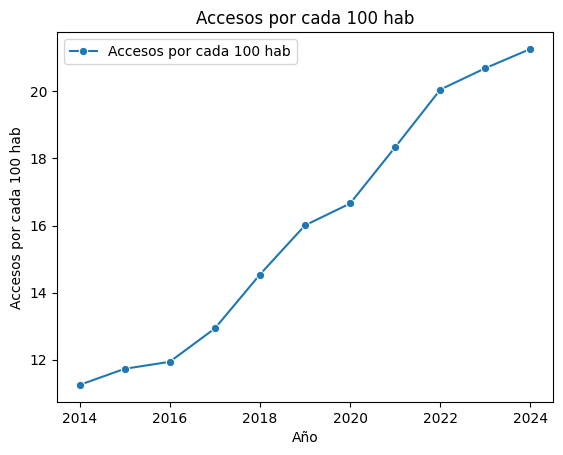

In [89]:
# Crear el gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=promedio_por_año, marker='o', label='Accesos por cada 100 hab')

# Añadir títulos y etiquetas
plt.title('Accesos por cada 100 hab')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')

# Mostrar el gráfico
plt.show()

PODEMOS VER QUE EL COMPORTAMIENTO DE LA CURVA ES SUAVE, LO QUE DENOTA QUE NO HAY VALORES ATIPICOS. 

POR OTRO LADO SE PUEDE OBSERVAR QUE TENEMOS UN CRECIMIENTO AÑO TRAS AÑO DE LA PENETRACION EN LA POBLACION. ESTO NOS DEMUESTRA QUE EXISTE CRECIMIENTO EN EL SECTOR.

In [90]:
# Eliminamos los acentos de la columna Provincias.

penetracion_poblacion['Provincia'] = penetracion_poblacion['Provincia'].apply(unidecode)

In [91]:
penetracion_poblacion['Provincia']

0         Buenos Aires
1      Capital Federal
2            Catamarca
3                Chaco
4               Chubut
            ...       
995           La Rioja
996            Mendoza
997           Misiones
998            Neuquen
999          Rio Negro
Name: Provincia, Length: 1000, dtype: object

In [104]:
# Veamos cuales son las provincias con mayor porcentaje de poblacion con acceso a internet en la actualidad.

penetracion_poblacion[['Provincia', 'Accesos por cada 100 hab']][(penetracion_poblacion['Año'] == 2024) & (penetracion_poblacion['Trimestre'] == 2)].sort_values('Accesos por cada 100 hab', ascending=False).reset_index(drop=True).head()

,Provincia,Accesos por cada 100 hab
0,Capital Federal,47.44
1,La Pampa,33.33
2,Tierra Del Fuego,32.28
3,San Luis,29.59
4,Cordoba,27.79


DE ESTOS VALORES PODEMOS DETERMINAR CUALES SON LAS 5 PROVINCIAS QUE TIENEN MAYOR COBERTURA DE SU POBLACION EN EL SECTOR.

In [34]:
# Guardamos el archivo para su posterior uso.

penetracion_poblacion.to_excel('Procesed data/penetracion-poblacion.xlsx', index=False)

HOJA Penetracion-hogares

In [154]:
penetracion_hogares = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Penetracion-hogares')

In [155]:
penetracion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.840000
1,2024,2,Capital Federal,116.370000
2,2024,2,Catamarca,68.810000
3,2024,2,Chaco,44.060000
4,2024,2,Chubut,86.330000
...,...,...,...,...
995,2014,1,La Rioja,16.294105
996,2014,1,Mendoza,31.913123
997,2014,1,Misiones,23.136539
998,2014,1,Neuquén,49.791605


In [156]:
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


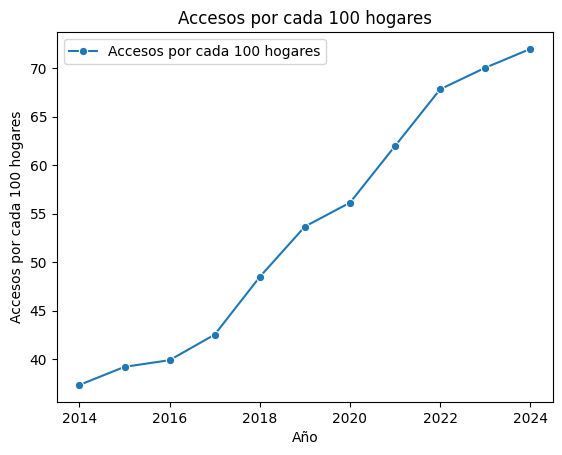

In [101]:
# Vemos la evolucion en el tiempo

promedio_por_año = penetracion_hogares[['Año', 'Accesos por cada 100 hogares']].groupby('Año').mean('Accesos por cada 100 hogares')

# Crear el gráfico de líneas
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=promedio_por_año, marker='o', label='Accesos por cada 100 hogares')

# Añadir títulos y etiquetas
plt.title('Accesos por cada 100 hogares')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')

# Mostrar el gráfico
plt.show()

AL IGUAL QUE LA PENETRACION POR HABITANTES, LA PENETRACION POR HOGAR TIENE UN CRECIMIENTO AÑO TRAS AÑO.

In [102]:
# Eliminamos los acentos de las Provincias.

penetracion_hogares['Provincia'] = penetracion_hogares['Provincia'].apply(unidecode)

In [103]:
penetracion_hogares['Provincia']

0         Buenos Aires
1      Capital Federal
2            Catamarca
3                Chaco
4               Chubut
            ...       
995           La Rioja
996            Mendoza
997           Misiones
998            Neuquen
999          Rio Negro
Name: Provincia, Length: 1000, dtype: object

In [147]:
# Veamos cuales son las provincias con mayor porcentaje de accesos por hogar.

penetracion_hogares[['Provincia', 'Accesos por cada 100 hogares']][(penetracion_hogares['Año'] == 2024) & (penetracion_hogares['Trimestre'] == 2)].sort_values('Accesos por cada 100 hogares', ascending=False).reset_index(drop=True).head()

,Provincia,Accesos por cada 100 hogares
0,Capital Federal,116.37
1,Tierra Del Fuego,108.89
2,San Luis,103.40
3,La Pampa,101.17
4,Cordoba,90.79


ESTOS VALORES MUESTRAN LAS 5 PROVINCIAS QUE TIENEN MAYOR COBERTURA DE LOS HOGARES CON ACCESO A INTERNET.

In [148]:
# Vamos a crear una columna id para poder manejar los datos en el tiempo en el dashboard.

penetracion_hogares['id'] = penetracion_hogares['Año'].astype(str).str.cat(penetracion_hogares['Trimestre'].astype(str),sep='-')

In [149]:
penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,id
0,2024,2,Buenos Aires,79.84,2024-2
1,2024,2,Capital Federal,116.37,2024-2
2,2024,2,Catamarca,68.81,2024-2
3,2024,2,Chaco,44.06,2024-2
4,2024,2,Chubut,86.33,2024-2


In [150]:
# Guardamos el archivo.

penetracion_hogares.to_excel('Procesed data/penetracion-hogares.xlsx', index=False)

HOJA Penetracion-totales

In [106]:
penetracion_totales = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Penetracion-totales')

In [107]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [108]:
penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [109]:
# Vamos a eliminar la columna Periodo que no nos brinda ninguna informacion util.

penetracion_totales.drop(labels='Periodo', axis=1, inplace=True)

In [110]:
penetracion_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


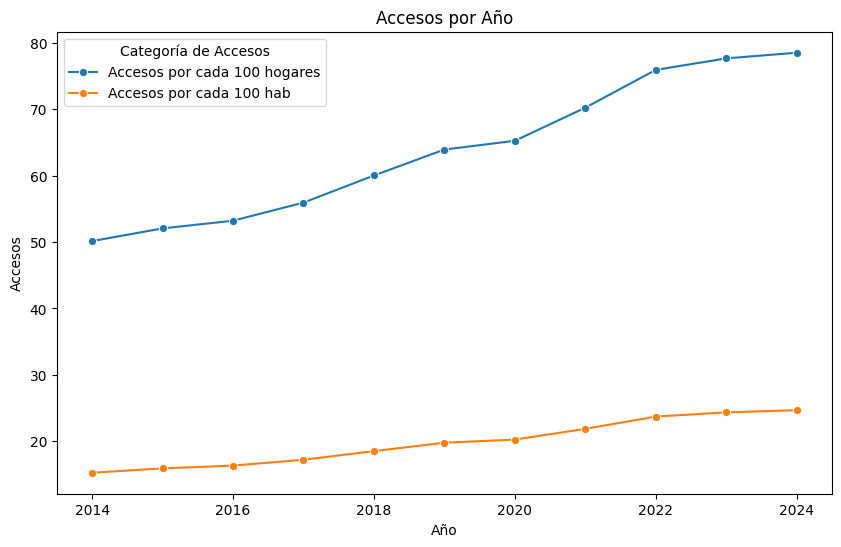

In [111]:
# Veamos el comportamiento en el tiempo del %de accesos tanto a hogares como a los habitantes.

promedio_por_año = penetracion_totales[['Año', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].groupby('Año').mean()

# Graficamos para visualizar el comportamiento

plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=promedio_por_año, marker='o', label='Accesos por cada 100 hogares')
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=promedio_por_año, marker='o', label='Accesos por cada 100 hab')

# Añadir títulos y etiquetas
plt.title('Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend(title='Categoría de Accesos')

# Mostrar el gráfico
plt.show()


PODEMOS VER QUE AMBAS CURVAS TIENEN UN COMPORTAMIENTO SIMILAR Y CRECEN EN SIMULTANEO.

In [112]:
# Vamos a crear una columna id para que los datos sean manejables en el dashboard.

penetracion_totales['id'] = penetracion_totales['Año'].astype(str).str.cat(penetracion_totales['Trimestre'].astype(str),sep='-')

In [113]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,id
0,2024,2,78.13,24.57,2024-2
1,2024,1,78.89,24.79,2024-1
2,2023,4,78.56,24.66,2023-4
3,2023,3,77.84,24.41,2023-3
4,2023,2,77.02,24.14,2023-2


In [50]:
# Guardamos los datos en un nuevo archivo.

penetracion_totales.to_excel('Procesed data/penetracion-totales.xlsx', index=False)

HOJA Totales Accesos por rango

In [75]:
totales_accesos_por_rango = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Totales Accesos por rango')

In [76]:
totales_accesos_por_rango.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


ESTA HOJA NO SE VA A TENER EN CUENTA YA QUE TENEMOS EN OTRA TABLA LOS DATOS DE LA VELOCIDAD. NO APORTA INFORMACION EXTRA.

HOJA Accesos por rangos

In [82]:
accesos_por_rango_velocidad = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Accesos por rangos')

In [83]:
accesos_por_rango_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


ESTA HOJA NO SE VA A TENER EN CUENTA YA QUE TENEMOS DATOS DE LA VELOCIDAD. NO APORTA INFORMACION EXTRA.

HOJA Ingresos

In [114]:
ingresos = pd.read_excel('Raw data\Internet (Principal).xlsx', sheet_name='Ingresos ')

In [115]:
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2033,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


In [116]:
# Vemos que hay un valor que no corresponde en el Año: 2033. 

ingresos['Año'][ingresos['Año'] == 2033] = 2023

C:\Users\franc\AppData\Local\Temp\ipykernel_14116\249687987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ingresos['Año'][ingresos['Año'] == 2033] = 2023


In [117]:
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2023,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


In [118]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        42 non-null     int64  
 1   Trimestre                  42 non-null     int64  
 2   Ingresos (miles de pesos)  42 non-null     float64
 3   Periodo                    42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [119]:
# Borramos la columna 'Periodo'.

ingresos.drop(labels='Periodo', axis=1, inplace=True)

In [120]:
# Agregamos columna id para organizacion.

ingresos['id'] = ingresos['Año'].astype(str).str.cat(ingresos['Trimestre'].astype(str),sep='-')

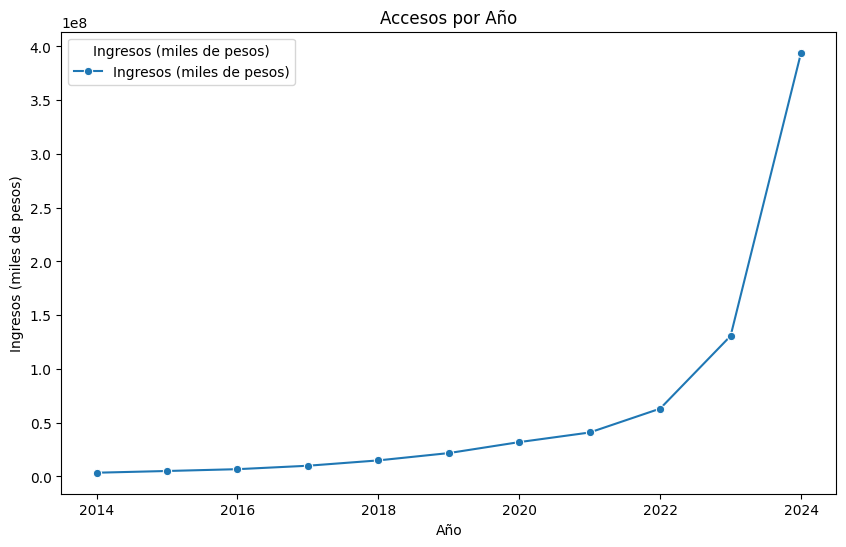

In [121]:
# Vemos el comportamiento de los ingresos.

promedio_por_año = ingresos[['Año', 'Ingresos (miles de pesos)']].groupby('Año').mean()

# Graficamos para visualizar el comportamiento

plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=promedio_por_año, marker='o', label='Ingresos (miles de pesos)')

# Añadir títulos y etiquetas
plt.title('Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend(title='Ingresos (miles de pesos)')

# Mostrar el gráfico
plt.show()

A PARTIR DE ESTE GRAFICO, PODRIAMOS AFIRMAR QUE LOS INGRESOS TIENEN UN CRECIMIENTO AÑO TRAS AÑO. SABIENDO QUE EL VALOR DEL PESO ARGENTINO ES MUY VARIABLE, VAMOS A PASAR LOS VALORES A UNA MONEDA MAS ESTABLE PARA TENER OTRO PANORAMA.

In [123]:
# Vamos a pasar los valores de ingresos a dolares para tener una comparacion mas estable en el tiempo que el peso.
# Fuente de los historicos del valor del dolar: Banco de la Nacion Argentina.

dolar_historico = pd.read_csv('Raw data\dolar_historico.csv', sep=';')

In [124]:
dolar_historico.head()

,Fecha cotizacion,Compra,Venta,Unnamed: 3
0,2/1/2014,"6,5050","6,5450",NaN
1,3/1/2014,"6,5200","6,5600",NaN
2,6/1/2014,"6,5550","6,5950",NaN
3,7/1/2014,"6,5600","6,6000",NaN
4,8/1/2014,"6,5650","6,6050",NaN


In [125]:
dolar_historico.drop(labels=['Compra', 'Unnamed: 3'], axis=1, inplace=True)

In [126]:
dolar_historico['Fecha cotizacion'] = pd.to_datetime(dolar_historico['Fecha cotizacion'], format='%d/%m/%Y')

In [127]:
dolar_historico['Año'] = dolar_historico['Fecha cotizacion'].dt.year
dolar_historico['Trimestre'] = dolar_historico['Fecha cotizacion'].dt.quarter

In [128]:
dolar_historico['id'] = dolar_historico['Año'].astype(str).str.cat(dolar_historico['Trimestre'].astype(str),sep='-')

In [129]:
dolar_historico.drop(labels=['Fecha cotizacion', 'Año', 'Trimestre'], axis=1, inplace=True)

In [130]:
dolar_historico.rename(columns={'Venta':'Precio_dolar'}, inplace=True)

In [131]:
dolar_historico

,Precio_dolar,id
0,"6,5450",2014-1
1,"6,5600",2014-1
2,"6,5950",2014-1
3,"6,6000",2014-1
4,"6,6050",2014-1
...,...,...
2644,"1017,5000",2024-4
2645,"1018,0000",2024-4
2646,"1018,5000",2024-4
2647,"1019,0000",2024-4


In [132]:
dolar_historico['Precio_dolar'] = dolar_historico['Precio_dolar'].str.replace(',', '.')

In [133]:
# Cambiamos el formato de la columna a float.

dolar_historico['Precio_dolar'] = dolar_historico['Precio_dolar'].astype(float)

In [134]:
# Vamos a agrupar por id y calculamos el valor promedio del precio del dolar.

dolar_historico = dolar_historico.groupby('id').mean()

In [135]:
dolar_historico

,Precio_dolar
id,
2014-1,7.621500
2014-2,8.085763
2014-3,8.296672
2014-4,8.507627
2015-1,8.691017
2015-2,8.958525
2015-3,9.255703
2015-4,10.228583
2016-1,14.642333


In [136]:
ingresos = pd.merge(ingresos, dolar_historico, how='left', on='id')

In [137]:
ingresos

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar
0,2024,2,4.420322e+08,2024-2,904.500000
1,2024,1,3.461990e+08,2024-1,852.762500
2,2023,4,1.673760e+08,2023-4,462.696949
3,2023,3,1.331066e+08,2023-3,326.585938
4,2023,2,1.180603e+08,2023-2,241.129310
5,2023,1,1.041350e+08,2023-1,199.080645
6,2022,4,7.244348e+07,2022-4,168.929167
7,2022,3,6.408678e+07,2022-3,141.992188
8,2022,2,6.041950e+07,2022-2,123.055085
9,2022,1,5.521931e+07,2022-1,111.700820


In [ ]:
# Calculamos la nueva columna con el valor de los ingresos en USD.

ingresos['ingresos_usd'] = ingresos['Ingresos (miles de pesos)'] / ingresos['Precio_dolar']

In [139]:
ingresos = ingresos.sort_values(by=['Año', 'Trimestre'])

In [140]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
41,2014,1,2.984054e+06,2014-1,7.621500,391531.090833
40,2014,2,3.270816e+06,2014-2,8.085763,404515.482394
39,2014,3,3.478638e+06,2014-3,8.296672,419281.103943
38,2014,4,3.950441e+06,2014-4,8.507627,464341.081864
37,2015,1,4.876385e+06,2015-1,8.691017,561083.397213


In [142]:
ingresos_grafico = ingresos.reset_index(drop=True).reset_index()
ingresos_grafico.head()

,index,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
0,0,2014,1,2.984054e+06,2014-1,7.621500,391531.090833
1,1,2014,2,3.270816e+06,2014-2,8.085763,404515.482394
2,2,2014,3,3.478638e+06,2014-3,8.296672,419281.103943
3,3,2014,4,3.950441e+06,2014-4,8.507627,464341.081864
4,4,2015,1,4.876385e+06,2015-1,8.691017,561083.397213


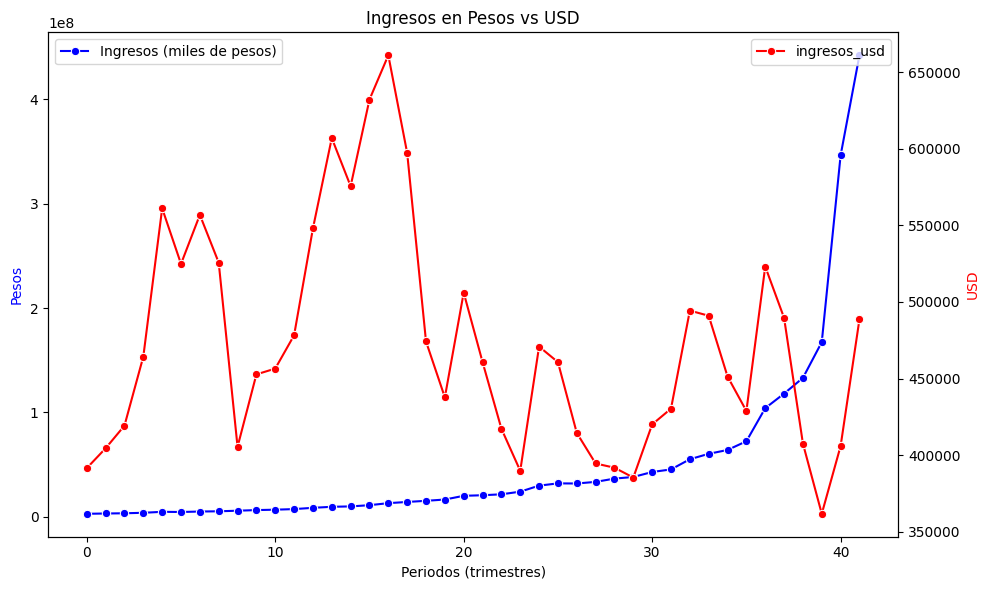

In [ ]:
# Vamos a graficar el comportamiento de ambas curvas (pesos y usd)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Ingresos en pesos
sns.lineplot(data=ingresos_grafico, x='index', y='Ingresos (miles de pesos)', ax=ax1, marker='o', label='Ingresos (miles de pesos)', color='b')

# Crear el eje secundario para los USD
ax2 = ax1.twinx()

# Ingresos en USD
sns.lineplot(data=ingresos_grafico, x='index', y='ingresos_usd', ax=ax2, marker='o', label='ingresos_usd', color='r')

# Títulos y etiquetas
ax1.set_title('Ingresos en Pesos vs USD')
ax1.set_xlabel('Periodos (trimestres)')
ax1.set_ylabel('Pesos', color='b')
ax2.set_ylabel('USD', color='r')

# Mostrar el gráfico
fig.tight_layout()
plt.show()


In [145]:
ingresos[(ingresos['Año'] >= 2015) & (ingresos['Año'] <= 2016)]

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
37,2015,1,4.876385e+06,2015-1,8.691017,561083.397213
36,2015,2,4.701791e+06,2015-2,8.958525,524839.851958
35,2015,3,5.153739e+06,2015-3,9.255703,556817.652290
34,2015,4,5.376899e+06,2015-4,10.228583,525673.891562
33,2016,1,5.936845e+06,2016-1,14.642333,405457.569593
32,2016,2,6.534241e+06,2016-2,14.433065,452727.180025
31,2016,3,6.912442e+06,2016-3,15.142188,456502.175716
30,2016,4,7.483980e+06,2016-4,15.649180,478234.657438


In [146]:
ingresos[ingresos['Año'] == 2018]

,Año,Trimestre,Ingresos (miles de pesos),id,Precio_dolar,ingresos_usd
25,2018,1,1.317146e+07,2018-1,19.926667,660996.615803
24,2018,2,1.431947e+07,2018-2,23.975000,597266.630270
23,2018,3,1.541098e+07,2018-3,32.498413,474207.181612
22,2018,4,1.663769e+07,2018-4,38.008475,437736.235787


PODEMOS VER QUE LOS INGRESOS EN DOLARES SON MUY VARIADOS. POR EJEMPLO, PARA EL TRIMESTRE 4 DEL 2015 Y TRIMESTRE 1 DEL 2016, LA DIFERENCIA VIENE DADA POR UNA DISMINUCION EN EL VALOR DEL PESO (usd 10,22 A usd 14,64 pesos). ASI TAMBIEN SE PUEDE OBSERVAR QUE EN EL AÑO 2018 EXISTE UNA DEPRECIACION DEL PESO CONSIDERABLE, LO CUAL EXPLICA EN PARTE LO QUE SUCEDE EN LA GRAFICA.

PODEMOS SABER CON ESTOS VALORES, QUE LA INESTABILIDAD EN EL VALOR DEL PESO, GENERA INCERTIDUMBRE EN LOS INGRESOS. POR LO TANTO, PARA CUALQUIER EMPRESA DEL EXTERIOR QUE TIENE INTERES EN INGRESAR AL MERCADO ARGENTINO, TIENE QUE TENER EN CUENTA ESTA FLUCTUACION.

In [128]:
ingresos.to_excel('Procesed data/ingresos.xlsx', index=False)

LAS HOJAS RESTANTES DEL ARCHIVO PRINCIPAL (Acc_vel_loc_sinrangos, Velocidad_sin_Rangos, Dial-BAf, Totales Dial-BAf) NO VAN A SER CONSIDERADAS PARA EL ANALISIS YA QUE NO CUENTAN CON INFORMACION RELEVANTE O ES CONFUSA. 

CONCLUSIONES DEL EDA

A PARTIR DEL EDA PODEMOS DETERMINAR CUALES SON LOS DATOS DE INTERES PARA EL ANALISIS Y EL DASHBOARD: 

TECNOLOGIAS EXISTENTES Y PREDOMINANTES

VELOCIDADES PROMEDIO POR PROVINCIAS

CANTIDAD DE ACCESOS POR PROVINCIA

% DE ACCESOS POR POBLACION Y HOGARES DISCRIMINADO POR PROVINCIAS Y SU EVOLUCION EN EL TIEMPO

EVOLUCION EN EL TIEMPO DE LAS TECNOLOGIAS, LAS VELOCIDADES Y CANTIDAD DE ACCESOS

SE PROPONE LA REALIZACION DE 5 KPI QUE PERMITAN EVALUAR DATOS DE INTERES A LA EMPRESA

1) Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. (OBLIGATORIO)
2) Aumentar en un 1% la cantidad de accesos cada 100 de poblacion a nivel pais en un trimestre.
3) Aumentar en un 1% la cantidad de accesos cada 100 hogares a nivel pais en un trimestre.
4) Aumentar en un 3% la cantidad de accesos totales de internet para el proximo trimestre. 
5) Finalizar un año calendario con un ingreso en USD de mas de USD 250000.